# PYCARET
- PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment .


In [1]:
import pandas as pd


In [2]:
!pip install pycaret


     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 102kB 5.6MB/s 
     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 1.2MB 7.1MB/s 
     |████████████████████████████████| 266kB 14.9MB/s 
     |████████████████████████████████| 7.0MB 11.7MB/s 
     |████████████████████████████████| 3.2MB 40.0MB/s 
     |████████████████████████████████| 1.6MB 43.3MB/s 
     |████████████████████████████████| 133kB 41.5MB/s 
     |████████████████████████████████| 63.9MB 44kB/s 
     |████████████████████████████████| 389kB 37.3MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 2.1MB 40.4MB/s 
     |████████████████████████████████| 235kB 39.2MB/s 
     |████████████████████████████████| 6.3MB 41.9MB/s 
     |████████████████████████████████| 552kB 26.6MB/s 
     |████████████████████████████████| 604kB 32.5MB/s 
  

## Data Load
- PyCaret’s data repository to load the data using the get_data() function (This will require internet connection).

In [17]:
# Importing dataset
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [18]:
dataset.shape


(6000, 8)

In [19]:
dataset.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


## Train -Test Split

In [21]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


## Setting up Environment in PyCaret
- Let us prepare a modeling pipeline using PyCaret’s setup module.

In [22]:
# Importing module and initializing setup
from pycaret.regression import *
clf1 = setup(data = data, target = 'Price')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,489
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5400, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Comparing models

- Compare_models module helps us to visualise the results from all the models applied to the model

In [23]:
# comparing all models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,703.968500,1932950.211000,1369.155200,0.981600,0.077800,0.058600
1,CatBoost Regressor,618.651100,1916202.882100,1340.916800,0.981500,0.066500,0.049300
2,Random Forest,726.772200,2498412.908800,1557.649200,0.976000,0.078500,0.058200
3,Light Gradient Boosting Machine,773.851600,3199624.733100,1745.775500,0.969400,0.078200,0.056900
4,Extreme Gradient Boosting,935.756000,3358409.325600,1818.580500,0.967400,0.106100,0.080700
5,Gradient Boosting Regressor,914.248000,3396559.402100,1822.770200,0.967000,0.103200,0.078200
6,Decision Tree,976.360100,4534732.250700,2086.646400,0.956600,0.105600,0.076700
7,Least Angle Regression,2458.673000,14739836.498700,3820.326800,0.858200,0.624200,0.293200
8,Linear Regression,2463.359900,14770846.168000,3824.064300,0.857900,0.625100,0.293500
9,Lasso Regression,2455.319700,14780488.689900,3825.190700,0.857800,0.628300,0.292500


## Create model
- Though catboost is performing best , we will take lightgbm for visualisation purposes

In [32]:
# creating logistic regression model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,856.4077,3.584238e+06,1893.2085,0.9679,0.0832,0.0600
1,807.7752,6.191012e+06,2488.1744,0.9377,0.0805,0.0572
2,654.4639,1.734965e+06,1317.1807,0.9796,0.0727,0.0539
3,753.9002,2.918494e+06,1708.3600,0.9696,0.0792,0.0569
4,687.9937,1.515406e+06,1231.0184,0.9853,0.0752,0.0572
5,760.6680,2.502355e+06,1581.8834,0.9757,0.0769,0.0567
6,826.8827,3.936798e+06,1984.1365,0.9628,0.0864,0.0581
7,801.5026,4.254383e+06,2062.6155,0.9660,0.0756,0.0552
8,679.5859,1.513779e+06,1230.3571,0.9837,0.0694,0.0538
9,909.3364,3.844818e+06,1960.8208,0.9654,0.0831,0.0604


## Tune Model

In [33]:
tuned_lightgbm = tune_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,770.5063,2.306814e+06,1518.8199,0.9794,0.0809,0.0586
1,754.7511,4.205355e+06,2050.6962,0.9577,0.0788,0.0564
2,695.2109,2.180713e+06,1476.7236,0.9743,0.0754,0.0553
3,883.0009,3.953566e+06,1988.3577,0.9588,0.0929,0.0667
4,738.2850,1.999583e+06,1414.0662,0.9806,0.0793,0.0593
5,768.3495,2.541620e+06,1594.2459,0.9753,0.0812,0.0585
6,754.6607,2.585358e+06,1607.9049,0.9756,0.0808,0.0572
7,740.0338,2.434862e+06,1560.4043,0.9805,0.0762,0.0558
8,761.2639,2.053099e+06,1432.8640,0.9779,0.0805,0.0610
9,841.8430,3.127437e+06,1768.4560,0.9718,0.0789,0.0576


## Plot model

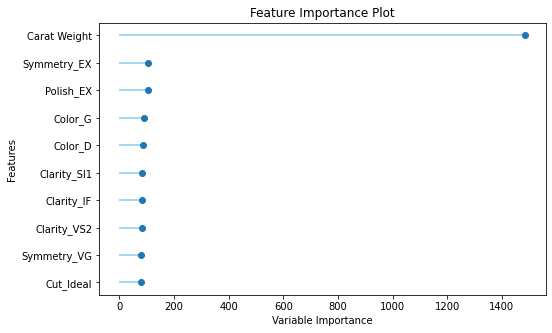

In [34]:
plot_model(tuned_lightgbm, plot='feature')

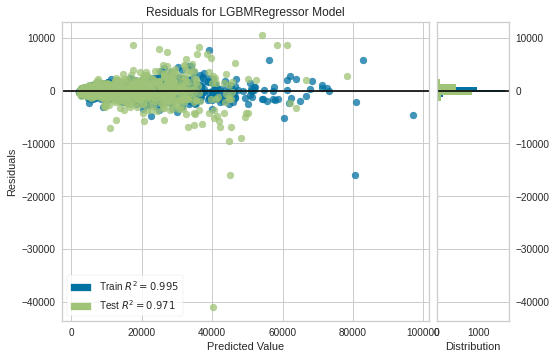

In [35]:
plot_model(tuned_lightgbm)

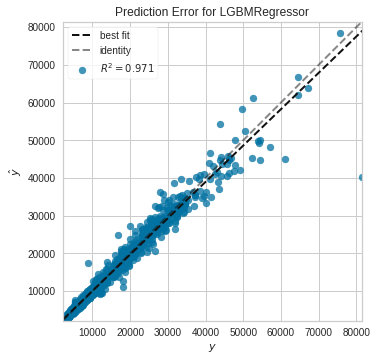

In [36]:
plot_model(tuned_lightgbm, plot = 'error')


In [37]:
predict_model(tuned_lightgbm);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,761.247,3.054237e+06,1747.6375,0.9707,0.0797,0.057


## Finalise your model

In [38]:
final_lightgbm = finalize_model(tuned_lightgbm)


In [39]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.4, max_depth=100,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
              n_estimators=150, n_jobs=-1, num_leaves=20, objective=None,
              random_state=489, reg_alpha=0.4, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Predict on test data

In [40]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10515.6006
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15905.2139
2,1.51,Good,F,SI1,VG,G,GIA,10429,10780.9149
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4628.8348
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4340.7888
